<a href="https://colab.research.google.com/github/sharathc21/ML/blob/main/CNN/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%pylab inline

import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential # Graph
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [2]:
from keras import backend 

In [3]:
from keras.models import load_model

In [14]:
from keras.layers import MaxPool2D


Loading the MNIST dataset, flatten the images, convert the class labels, and scale the data.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0].shape)
print(x_train.ndim)


(60000, 28, 28)
(60000,)
(28, 28)
3


1


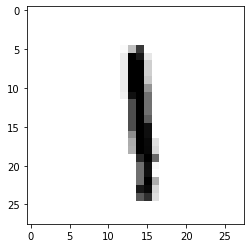

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])


In [7]:
# x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32') / 255
# x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32') / 255
# y_train = np_utils.to_categorical(y_train, 10)
# y_test = np_utils.to_categorical(y_test, 10)

In [8]:
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)


In [9]:
x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32')/255

print('x_train shape:', x_train.shape)


x_train shape: (60000, 28, 28, 1)


In [10]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [27]:
model = Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
# model.add(Convolution2D(64, 3, 3, padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))

model.add(Convolution2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(64, 3, 3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [28]:

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))


In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 5, 128)         147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                  

In [41]:

# model.add(ZeroPadding2D((1,1))
model.add(Convolution2D(256, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((2,2)))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding='same', activation="relu"))
model.add(MaxPool2D((2,2), strides=(2,2)))


ValueError: ignored

In [43]:

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3,padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

ValueError: ignored